In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 5

#### Question 1

<font size = 4 color = black face = "Times New Roman"> And We know that $n(t) = \frac{N}{2}(1 + e^{-2t/N})$,hence $t\propto -\ln(n \frac{N}{2})$, and the factor should be -\farc{2}{N}.

In [155]:
#define the initial values
N = 10000
n = [N]
t = 0
# Calculated n depends on  t
while t < 10000:
    r = np.random.random()
    p = n[t] / N
    if r <= p:
        n.append(n[t] - 1)
    else:
        n.append(n[t] + 1)
    t += 1
t = np.arange(0,10001,1)

In [156]:
#define the theoretical function
def n_function(N,t):
    return N/2*(1 + np.exp(-2 * t / N))

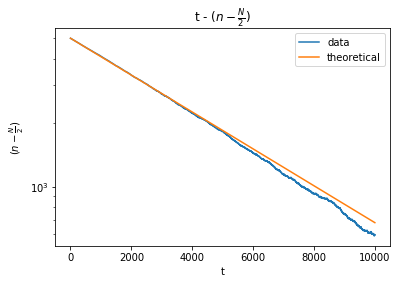

In [157]:
n_array = np.array(n) - N / 2
plt.semilogy(t,n_array)
plt.semilogy(t,n_function(N,t) - N / 2)
plt.xlabel('t')
plt.ylabel(r'$(n - \frac{N}{2})$')
plt.legend(['data','theoretical'])
plt.title(r't - $(n - \frac{N}{2})$')
plt.show()

<font size = 4 color = black face = "Times New Roman">

In [134]:
# linear fit
a, b = np.polyfit(t , np.log(n_array),1)
print(f'The factor is {a:.4f}')

The factor is -0.0002


<font size = 4 color = black face = "Times New Roman">The theoretical factor is $-\frac{2}{N} = -0.0002$,hence ,we can confirm that the time dependence of $n$ appear to be deterministic for sufficient large $N$. The function should be $n(t) = \frac{N}{2}(1 + e^{-2t/N})$

#### Question 2

In [27]:
def move_function(N):
    #define the initial values
    n = N
    t = 0
    while n != N/2:
        r = np.random.random()
        p = n /N
        if r <= p:
            n = n - 1
        else:
            n = n + 1
        t += 1
    return t

In [136]:
N = [8,16,64,400,800,3600]
t = []
j = 0
for i in N:
    t.append(move_function(i))
    print(f'When N = {N[j]}, it takes {t[j]} unit times to reach equilibrium.')
    j += 1

When N = 8, it takes 4 unit times to reach equilibrium.
When N = 16, it takes 12 unit times to reach equilibrium.
When N = 64, it takes 74 unit times to reach equilibrium.
When N = 400, it takes 618 unit times to reach equilibrium.
When N = 800, it takes 1100 unit times to reach equilibrium.
When N = 3600, it takes 7604 unit times to reach equilibrium.


In [138]:
N = np.arange(8,3602,2)
t = []
for i in N:
    t.append(move_function(i))

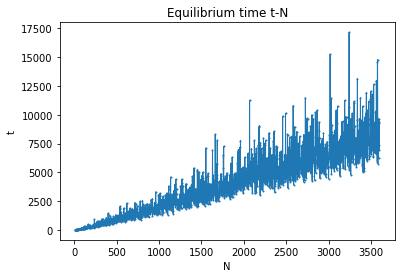

In [144]:
plt.plot(N,t,'-o',lw='1',ms='1')
plt.xlabel('N')
plt.ylabel('t')
plt.title('Equilibrium time t-N')
plt.show()

<font size = 4 color = black face = "Times New Roman">This time is positively correlated with the number of particles

#### Question 3

In [162]:
def measure_function(N=1000):
    n = [N/2]
    t = 0
# Calculated n depends on  t
    while t < 10000:
        r = np.random.random()
        p = n[t] / N
        if r <= p:
            n.append(n[t] - 1)
        else:
            n.append(n[t] + 1)
        t += 1
    return n

In [165]:
N_list = [8,16,64,400,800,3600]
n = []
i = 0
for N in N_list:
    n.append(measure_function(N_list[i]))
    i += 1

In [173]:
aver_n_2 = (np.array(n)**2).mean(axis=1)
aver_n = np.array(n).mean(axis=1)
dleat_n = aver_n_2 - aver_n**2

In [174]:
for  i in range(len(N_list)):
    print(f'When N = {N_list[i]} , delta n_square = {dleat_n[i]} ')

When N = 8 , delta n_square = 1.9973791042053648 
When N = 16 , delta n_square = 3.7539666891225068 
When N = 64 , delta n_square = 17.170616504992722 
When N = 400 , delta n_square = 96.62522030968103 
When N = 800 , delta n_square = 152.76427669700934 
When N = 3600 , delta n_square = 380.2845021770336 


In [175]:
r_flu = np.sqrt(dleat_n) / aver_n

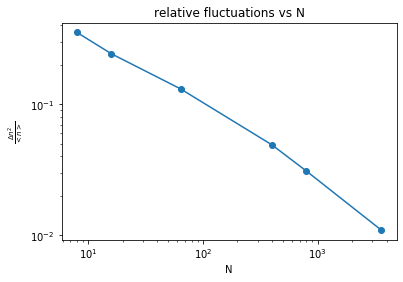

In [180]:
plt.loglog(N_list,r_flu,'-o')
plt.xlabel('N')
plt.ylabel(r'$\frac{\Delta n^2}{<n>}$')
plt.title('relative fluctuations vs N')
plt.show()

<font size = 4 color = black face = "Times New Roman"> From this figure we are easy to know that when N is larger, $\frac{\Delta n^2}{<n>}$ is smaller.

### Problem 6

In [9]:
N = 100000
# Generates positions of dart.
dart_positions = np.random.rand(N, 2)

In [10]:
# Get the distance between each dart and origin
distance = np.linalg.norm(dart_positions,axis = 1)

In [11]:
# The number of darts that insder the circle for N = 1,2,3... 10000
inside = np.cumsum(distance < 1)

In [12]:
numbers = np.arange(1, N+1, 1)

In [13]:
# calculate pi
calculated_pi = 4 * inside / numbers
pi = np.pi

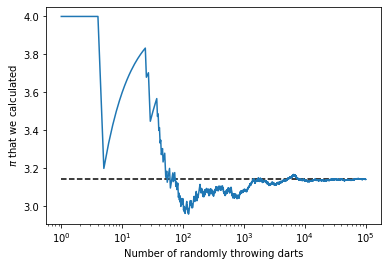

When N = 10000 the calculated pi = 3.14


In [14]:
fig,ax = plt.subplots()
plt.semilogx(numbers, calculated_pi)
ax.hlines(y = np.pi, xmin = 1, xmax = N+1, linestyle='--') 
plt.xlabel('Number of randomly throwing darts')
plt.ylabel(r'$\pi$ that we calculated')
plt.show()
print(f'When N = 10000 the calculated pi = {calculated_pi[-1]:.3}')

<font size = 4 color = black face = "Times New Roman">Hence we have gotten the right value of $\pi$, when N is large enough.

In [17]:
def repeat_experiment(count = 1000, N = 5000):
    calculated_pi = []
    for i in range(count):
        dart_positions = np.random.rand(N, 2)
        distance = np.linalg.norm(dart_positions,axis = 1)
        inside = len(distance[distance < 1])
        calculated_pi.append(4 * inside / N)

    return np.var(calculated_pi), np.mean(calculated_pi)

In [20]:
print(f'When N = 5000 repeat 1000 times , average value is {repeat_experiment()[1]:.3f} , the standar deviation is {repeat_experiment()[0]}')

When N = 5000 repeat 1000 times , average value is 3.142 , the standar deviation is 0.0005124505337599994
